In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

api_key='b7e275fadbb426492fb00b0bc1f3b740'

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

643

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        record= record + 1
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hobart
City not found. Skipping...
Processing Record 2 | Busselton
Processing Record 3 | Hermanus
Processing Record 4 | Shepsi
Processing Record 5 | Dikson
Processing Record 6 | Rikitea
Processing Record 7 | Cabedelo
Processing Record 8 | Thompson
Processing Record 9 | Tenabo
City not found. Skipping...
Processing Record 10 | Nikolskoye
Processing Record 11 | Mahebourg
Processing Record 12 | Komsomolskiy
Processing Record 13 | Avarua
City not found. Skipping...
City not found. Skipping...
Processing Record 14 | Yumen
Processing Record 15 | Rawson
Processing Record 16 | Segezha
Processing Record 17 | Gayny
Processing Record 18 | Ballina
Processing Record 19 | Kaitangata
Processing Record 20 | Ushuaia
Processing Record 21 | Longyearbyen
Processing Record 22 | Lebu
Processing Record 23 | Nyuksenitsa
Processing Record 24 | Cape Town
Processing Record 25 | Atuona
Processing Record 26 | Talnakh
Processing Record 2

Processing Record 218 | Ardakan
Processing Record 219 | Kahului
Processing Record 220 | Anda
Processing Record 221 | Fallon
Processing Record 222 | Concepcion del Oro
Processing Record 223 | Gorontalo
Processing Record 224 | Fairbanks
City not found. Skipping...
Processing Record 225 | Harindanga
Processing Record 226 | Lapi
City not found. Skipping...
Processing Record 227 | Chapais
City not found. Skipping...
Processing Record 228 | Aswan
Processing Record 229 | Jawhar
City not found. Skipping...
Processing Record 230 | Yamada
Processing Record 231 | Maltahohe
Processing Record 232 | Buckeye
Processing Record 233 | Teahupoo
Processing Record 234 | Tasiilaq
Processing Record 235 | Lafiagi
Processing Record 236 | Pisco
Processing Record 237 | Port Moresby
Processing Record 238 | Caraquet
Processing Record 239 | Codrington
Processing Record 240 | Elk City
Processing Record 241 | Los Llanos de Aridane
Processing Record 242 | Les Cayes
Processing Record 243 | Lompoc
Processing Record 244 

City not found. Skipping...
Processing Record 448 | Rundu
City not found. Skipping...
Processing Record 449 | Karratha
Processing Record 450 | Camacha
Processing Record 451 | Luganville
Processing Record 452 | Hami
Processing Record 453 | Malanje
Processing Record 454 | Yar-Sale
Processing Record 455 | Conakry
Processing Record 456 | Visnes
Processing Record 457 | Havoysund
Processing Record 458 | Alamos
Processing Record 459 | Innisfail
Processing Record 460 | Dayong
Processing Record 461 | Lebedinyy
Processing Record 462 | Kushiro
Processing Record 463 | Vila Velha
Processing Record 464 | Alofi
Processing Record 465 | Trairi
Processing Record 466 | Nemuro
Processing Record 467 | Saldanha
Processing Record 468 | Oranjemund
Processing Record 469 | Nampa
Processing Record 470 | Riachao
Processing Record 471 | San Lorenzo
Processing Record 472 | Gat
Processing Record 473 | Balabac
Processing Record 474 | Tvoroyri
Processing Record 475 | Santa Maria
Processing Record 476 | Viedma
Processi

In [5]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weatherpy_dict)

weather_data.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

In [6]:
weather_data.to_csv('output_data/weather_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,90,AU,1567627822,80,-42.88,147.33,45.00,3.36
1,Busselton,26,AU,1567628041,68,-33.64,115.35,37.00,10.16
2,Hermanus,65,ZA,1567628044,88,-34.42,19.24,57.99,21.50
3,Shepsi,0,RU,1567628252,73,44.04,39.15,75.29,13.06
4,Dikson,100,RU,1567628051,98,73.51,80.55,43.43,16.69


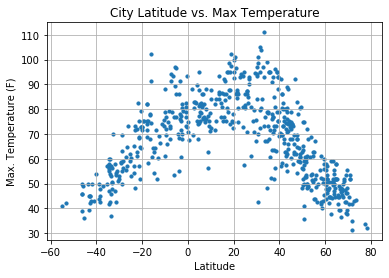

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Max_Temp_vs_Latitude.png")

plt.show()

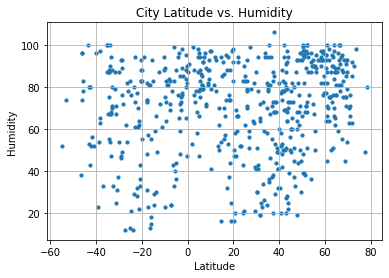

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Humidity_vs_Latitude.png")

plt.show()

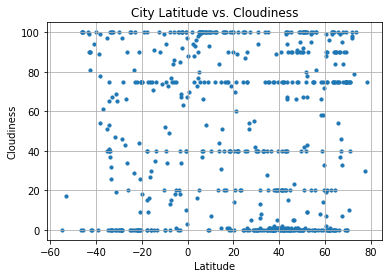

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Cloudiness_vs_Latitude.png")

plt.show()

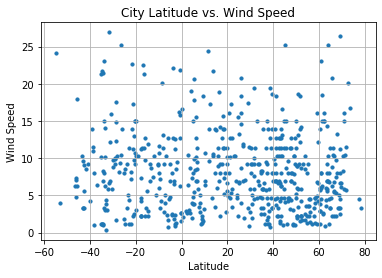

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Wind_Speed_vs_Latitude.png")

plt.show()